## Antes de começar...

Lembre-se, que em python, podemos passar inclusive classes por parametros:

In [1]:
class Xuxu:
    def __init__(self, num):
        self.num = num-1
class Xaxa:
    def __init__(self, num):
        self.num = num+1

def kaka(ClasseXuxuOuXaxa):
    obj = ClasseXuxuOuXaxa(100)
    print(f"Numero: {obj.num}")

kaka(Xuxu)
kaka(Xaxa)

Numero: 99
Numero: 101


## Avaliação e Otimização de Parametros

Cada método possui alguns parametros a serem ajustados. Alguns parametros são essenciais para, por exemplo, diminuir o _overfitting_ e conseguirmos um modelo que faça predições com menos erros possíveis. Assim, dado os parametros $(p_1, p_2, p_3)$ nosso objetivo é encontrar uma solução ótima, ou seja, valores de $p_1$, $p_2$ e $p_3$ que maximiza o resultado (por meio de Macro F1 ou acurácia, por exemplo).

Por exemplo, a implementação de árvore de decisão do Scikitlearn, temos o parametro `min_samples` que define o mínimo de exemplos necessários para que um nodo da árvore efetue a divisão. Como é inviável testarmos todos os paramtros podemos variá-lo, por exemplo, de 0.1 em 0.1 passos entre 0.1 e 0.9 para tentarmos encontrar a solução ótima. 

O algoritmo RandomForest possui mais parametros além do `min_samples_split` (que é o equivalente ao min_samples da árvore de decisão), por exemplo, a porcentagem de atributos (features) que será considerada para a divisão  de uma determinada árvore (`max_features`). Como esses dois parametros afetam muito o resultado, nosso *objetivo* é encontrar o valor `min_samples_split` e `max_features` que *maximizam* o resultado. Similarmente a uma arvore de decisão, como o treinamento de um método de aprendizado de máquina é custoso, avaliar muitos parametros pode ser inviável, por isso, poderiamos variar cada parametro da seguinte forma: 

- min_samples_split: {0.1, 0,2, ...,0.9}
- max_features: {0.1, 0,2, ...,0.9}

Com essa quantidade de parametro podemos fazer um [GridSearch]() nele, testamos todas as combinações ou seja, para cada `min_sample_split`, você testará todos os valores `max_features` (${0.1, 0,2, ...,0.9}$). Porém, mesmo assim, o GridSearch pode ficar inviável se quiséssemos colocar mais parametros. Por  exemplo, um outro parametro importante neste método é o número de árvores que o algoritmo irá utilizar (`n_estimators`) que poderiamos variar da seguinte forma:

- n_estimators: {1, 20, 40, 60, 80, 100}

Porém, mesmo com apenas 5 valores, a quantidade de combinações que precisariamos testar seria 5 vezes mais.  Além disso, não conseguimos explorar bem o espaço de busca. Por exemplo, vamos supor que a solução ótima seria com 30 árvores, max_features=0.15 e min_samples_split=0.35, ou seja, esta seria a solução que maximizaria o resultado. Usando a variação acima, não conseguiriamos encontrá-la. 

Uma das formas de conseguir explorar melhor o espaço quando temos muitas dimensões é, ao invés de fazer um GridSearch, fazermos um RandomSearch. Nele, é sorteado aleatoriamente valores para cada um dos parametros. Por exemplo:

In [1]:
import random
n_combinacoes = 10
random.seed(1)
print("Possíveis soluções a serem testadas:")
for i in range(n_combinacoes):
    min_samples_split = random.uniform(0.1,0.9)
    max_features = random.uniform(0.1,0.9)
    n_estimators = random.randint(1,1000)
    print(f"({min_samples_split},{max_features},{n_estimators})")

Possíveis soluções a serem testadas:
(0.207491395289921,0.7779469895497861,783)
(0.15048545751016748,0.19433496293684885,780)
(0.4595928518309905,0.6212743781782104,808)
(0.26796384509718174,0.4902853252193181,915)
(0.7686120831358958,0.4462136543240427,781)
(0.7137261033183696,0.6566662934147548,273)
(0.6772320258726261,0.2830097770163621,968)
(0.1817817264880386,0.35394370574110734,23)
(0.12035668879476864,0.5331299782347972,962)
(0.8049870871377244,0.6491870833432638,993)


Podemos ainda melhorar essa busca ao usar o algoritmo Tree-Structured Parzen Estimator (TPE). De forma similar ao RandomSearch, esse algoritmo também sorteia aleoriamente valores. Porém, os valores não são totalmente aleatórios. Inicialmente, gera-se $c$ combinações totalmente aleatórias e, logo após, será gerado outras opções também aleatórias porém com uma probabilidade maior de ser sorteado soluções:

- próxima a locais com bons resultados 
- próxima a regiões que ainda não foram exploradas

[Veja um video explicativo aqui](https://www.youtube.com/watch?v=cWyuUpZfZl0&list=PLwIaU1DGYV6tUx10fCTw5aPnqypbbK_GJ&index=32) - ele demonstra o uso em parametros de redes neurais profundas, porém, a ideia é a mesma. Ao ver o video, é interessante notar que em redes neurais profundas, chamamos tais parametros de hiperparametros. [Veja também um texto sobre ajustes de parametros (em inglês)](https://medium.com/criteo-labs/hyper-parameter-optimization-algorithms-2fe447525903).

Nem sempre o TPE é melhor que o Grid Search. Depende muito do problema, da quantidade e sensibilidade dos parametros e do método de aprendizado de máquina. A única forma de descobrir qual é o melhor é avaliando ambos também ;).

### Optuna e otimização de parametros

O Optuna é uma biblioteca que facilita a otimização de parametros. Para simplificar, considere a função $f(x) = -2x^2 + x + 4$ em que desejamos maximizar $f(x)$ e, neste caso, nosso parametro é o $x$. Assim, em outras palavras, temos que achar qual valor de $x$ obtém o maior resultado possível dessa função. Veja a representação grafica dessa função com a solução ótima encontrada:


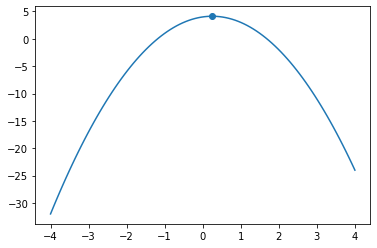

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def desenha_funcao(limit_inf=-4,limit_sup=4):
    # create 1000 equally spaced points between -10 and 10
    x = np.linspace(limit_inf, limit_sup, 100)

    # calculate the y value for each element of the x vector
    y = -2* x**2 + x + 4

    plt.plot(x, y)
    plt.scatter(0.25,4.125,marker="o")
desenha_funcao()

O optuna testará, com uma determinada estratégia, vários valores de $x$ com  o objetivo de encontrar esse ponto ótimo. 

Para isso, você deve criar uma **função objetivo** ou seja, uma função python que calcula o função $f(x)$ por meio de um $x$ escolhido com uma determinada estratégia (aleatório, por exemplo) para a tentativa especifica (definida pelo objeto [trial](https://optuna.readthedocs.io/en/latest/reference/trial.html)).

In [3]:
import optuna
def funcao_objetivo(trial: optuna.Trial):
    #trial: é a tentativa atual
    #sugggest uniform: função que sugere-se uma escolha de x aleatorio 
    #de forma uniforme (ou seja, todos os valores tem a mesma chance de ser escolhidos)
    #pq é uma sugestão: Dependendo da estrategia de busca, esse parametro pode nao ser uniformemente escolhido
    x = trial.suggest_uniform('x', -10, 10)
    return -2* x**2 + x + 4

Assim, pode-se instanciar um estudo  de parametros (objeto da classe [Study](https://optuna.readthedocs.io/en/latest/reference/study.html)) que efetua uma busca aleatória do parametro $x$, passando a função objetivo como parametro: 

In [4]:
from optuna.samplers import RandomSampler
#nossa funcao sera de maximizacao (por isso direction=maximize)
#o sampler que define a estratégia de busca. 
#Neste caso, será feita uma busca totalmente aleatória
study_random = optuna.create_study(sampler=RandomSampler(seed=1), direction="maximize")
#colocamos 30 tentativas
study_random.optimize(funcao_objetivo, n_trials=30)

[I 2021-11-29 15:15:25,688] A new study created in memory with name: no-name-7946690f-ed85-4122-9708-aefc1e3a6005
[I 2021-11-29 15:15:25,695] Trial 0 finished with value: -3.1678380688122374 and parameters: {'x': -1.6595599059485195}. Best is trial 0 with value: -3.1678380688122374.
[I 2021-11-29 15:15:25,698] Trial 1 finished with value: -30.427816059591684 and parameters: {'x': 4.4064898688431615}. Best is trial 0 with value: -3.1678380688122374.
[I 2021-11-29 15:15:25,700] Trial 2 finished with value: -205.90622311505624 and parameters: {'x': -9.997712503653101}. Best is trial 0 with value: -3.1678380688122374.
[I 2021-11-29 15:15:25,703] Trial 3 finished with value: -31.211278021240723 and parameters: {'x': -3.9533485473632046}. Best is trial 0 with value: -3.1678380688122374.
[I 2021-11-29 15:15:25,706] Trial 4 finished with value: -102.89000272158682 and parameters: {'x': -7.064882183657739}. Best is trial 0 with value: -3.1678380688122374.
[I 2021-11-29 15:15:25,709] Trial 5 fin

Veja os pontos analisados e a melhor solução encontrada usando esse método além da comparação com o valor ótimo (que seria 0.25): 

Melhor ponto: 0.7763346800671389 ponto ótimo: 0.25 diferença: 0.5263346800671389


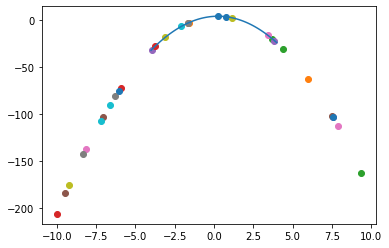

In [5]:
def plot_best_trials(study,x_otimo):
    desenha_funcao()

    #obtem o valor de paramtro x e o resultado para cada tentativa testada e armazena no vetor
    #para cada um desses valores, plota no grafico 
    for trial in study.get_trials():
        x = trial.params["x"]
        y = trial.value
        #apresenta apenas pontos com diferença < 20 do ponto otimo
        diff_otimo = abs(x_otimo-x)
        plt.scatter(x, y,marker="o")
    best_x = study.best_trial.params['x']
    print(f"Melhor ponto: {best_x} ponto ótimo: {x_otimo} diferença: {abs(best_x-x_otimo)}")
plot_best_trials(study_random,0.25)

Veja que, com a busca aleatória, encontramos um valor muito diferente do ideal. Agora, se fizermos uma busca usando o método Tree Partzen Estimator:

In [6]:
from optuna.samplers import TPESampler
#Para o TPE, é importante passar o numero de tentativas iniciais
#essas serão as unicas que serão totalmente aleatorias para explorar o espaço
tpe_sampler = TPESampler(n_startup_trials = 10,seed=1)
study_TP = optuna.create_study(sampler=tpe_sampler, direction="maximize")
#colocamos 30 tentativas (destas, 10 serão aleatorias e, o restante, considerando o algoritmo)
study_TP.optimize(funcao_objetivo, n_trials=30)

[I 2021-11-29 15:15:26,879] A new study created in memory with name: no-name-0b3ea473-6d76-452b-9c55-2f45c7532bf2
[I 2021-11-29 15:15:26,884] Trial 0 finished with value: -3.1678380688122374 and parameters: {'x': -1.6595599059485195}. Best is trial 0 with value: -3.1678380688122374.
[I 2021-11-29 15:15:26,887] Trial 1 finished with value: -30.427816059591684 and parameters: {'x': 4.4064898688431615}. Best is trial 0 with value: -3.1678380688122374.
[I 2021-11-29 15:15:26,889] Trial 2 finished with value: -205.90622311505624 and parameters: {'x': -9.997712503653101}. Best is trial 0 with value: -3.1678380688122374.
[I 2021-11-29 15:15:26,892] Trial 3 finished with value: -31.211278021240723 and parameters: {'x': -3.9533485473632046}. Best is trial 0 with value: -3.1678380688122374.
[I 2021-11-29 15:15:26,895] Trial 4 finished with value: -102.89000272158682 and parameters: {'x': -7.064882183657739}. Best is trial 0 with value: -3.1678380688122374.
[I 2021-11-29 15:15:26,898] Trial 5 fin

Melhor ponto: 0.1501828925401486 ponto ótimo: 0.25 diferença: 0.0998171074598514


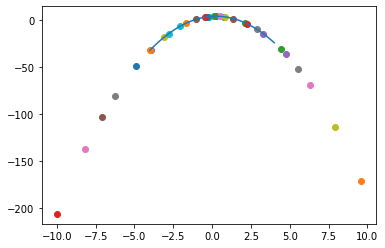

In [7]:
plot_best_trials(study_TP,0.25)

Veja que na busca usando o TPE houveram mais tentativas próximas ao ponto ótimo e a melhor solução ficou muito mais próxima ao ponto ótimo.

## Optuna em um método de aprendizado de máquina

Fizemos um exemplo ilustrativo e agora iremos mostrar como aplicar Optuna para avaliar parametros de um método de aprendizado de Máquina. O Optuna será aplicado em um fold. Ou seja, para um determinado fold, deverá ser avaliado qual é o melhor parametro, sempre usando os folds de validação desse fold. 

Veja um esqueleto do código que poderia ser feito, usando uma função dentro da outra:

In [8]:
from optuna.samplers import TPESampler
import optuna 
from tests import Dados
from resultado import Fold

def executa_fold(fold):
    
    def objetivo_ap_de_maquina(trial: optuna.Trial):
        #suponha que temos o parametro x para ajustar
        x = trial.suggest_uniform('x', -10, 10)
        
        #navega em cada um dos folds de validação 
        soma = 0
        for fold_validacao in fold.arr_folds_validacao:
            #1. roda um metodo de aprendizado de maquina para o fold_validacao 
            #usando o parametro x
            
            #2. armazena resultado em resultado fold
            resultado_fold = 0.5#colcoamos um resultado fixo para funcionar
            
            #3. faz o somatorio para a media
            soma += resultado_fold
        #4. a funcao objetivo é retornada como a media dos folds de validação
        return soma/len(fold.arr_folds_validacao)
    
    tpe_sampler = TPESampler(n_startup_trials = 10,seed=1)
    study_TP = optuna.create_study(sampler=tpe_sampler, direction="maximize")
    #colocamos 30 tentativas (destas, 10 serão aleatorias e, o restante, considerando o algoritmo)
    study_TP.optimize(objetivo_ap_de_maquina, n_trials=30)
    
    print(f"Melhor execução: {study_TP.best_trial.params}")
    #aplica o melhor parametro no teste
    #...
fold = Fold(Dados.df_treino,Dados.df_teste,"realClass",num_folds_validacao=5,num_repeticoes_validacao=2)
executa_fold(fold)

[I 2021-11-29 15:15:28,077] A new study created in memory with name: no-name-4dbdb920-3fbf-43a2-b3d4-426d85b37569
[I 2021-11-29 15:15:28,080] Trial 0 finished with value: 0.5 and parameters: {'x': -1.6595599059485195}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,083] Trial 1 finished with value: 0.5 and parameters: {'x': 4.4064898688431615}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,086] Trial 2 finished with value: 0.5 and parameters: {'x': -9.997712503653101}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,089] Trial 3 finished with value: 0.5 and parameters: {'x': -3.9533485473632046}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,097] Trial 4 finished with value: 0.5 and parameters: {'x': -7.064882183657739}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,100] Trial 5 finished with value: 0.5 and parameters: {'x': -8.153228104624045}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,102] Trial 6 finished with value: 0.5 a

Melhor execução: {'x': -1.6595599059485195}


Não se preocupe que o resultado que ésempre o mesmo, pois implementamos apenas o esqueleto do codigo e deixamos o resultado fixo como "0.5". No lugar disso, deveriamos colocar o resultado do método de aprendizado de máquina (como acurária ou macro f1, por exemplo).

O código não ficou tão bom pois, como não podemos criar parametros novos na função objetivo e temos que passar o fold na função objetivo, ela tem que ser uma "variavel global" a função. Então, se quisermos fazer dessa forma, a função objetivo sempre será sub-função da função/método que calcula todos os resultados. Isso não fica muito legivel e é pouco flexível. Pois, cada método de aprendizado de máquina possui sua própria variação de parametros. Criar várias funções objetivos dentro de uma função de calculo de resultado não ficaria tão legivel e você não poderia usar essas funções externamente. 

Para melhorarmos isso, podemos criar uma classe que é "invocável" ou seja, um classe em que os objetos podem ser chamados (veja [slides](https://daniel-hasan.github.io/cefet-web-grad/classes/python2/#27) e [video-aula](https://www.youtube.com/watch?v=EXmr7zttGWE&list=PLwIaU1DGYV6skjkahOKtpgs9bPXlrVrIp&index=10)). Assim, o fold seria um atributo dessa classe e o código ficaria mais limpo, da seguinte forma: 

In [9]:
class ObjetivoApDeMaquina:
    def __init__(self,fold):
        self.fold = fold
    def __call__(self, trial: optuna.Trial):
                #suponha que temos o parametro x para ajustar
        x = trial.suggest_uniform('x', -10, 10)
        
        #navega em cada um dos folds de validação 
        soma = 0
        for fold_validacao in fold.arr_folds_validacao:
            #1. roda um metodo de aprendizado de maquina para o fold_validacao 
            #usando o parametro x
            
            #2. armazena resultado em resultado fold
            resultado_fold = 0.5#colcoamos um resultado fixo para funcionar
            
            #3. faz o somatorio para a media
            soma += resultado_fold
        #4. a funcao objetivo é retornada como a media dos folds de validação
        return soma/len(fold.arr_folds_validacao)
def executa_fold(fold):

    otimiza_fold = ObjetivoApDeMaquina(fold)
    
    tpe_sampler = TPESampler(n_startup_trials = 10,seed=1)
    study_TP = optuna.create_study(sampler=tpe_sampler, direction="maximize")
    #colocamos 30 tentativas (destas, 10 serão aleatorias e, o restante, considerando o algoritmo)
    study_TP.optimize(otimiza_fold, n_trials=30)
    
    print(f"Melhor execução: {study_TP.best_trial.params}")
    #aplica o melhor parametro no teste
    #...
fold = Fold(Dados.df_treino,Dados.df_teste,"realClass",num_folds_validacao=5,num_repeticoes_validacao=2)
executa_fold(fold)


[I 2021-11-29 15:15:28,375] A new study created in memory with name: no-name-97e537ce-584a-4721-b403-52f81bbd3958
[I 2021-11-29 15:15:28,377] Trial 0 finished with value: 0.5 and parameters: {'x': -1.6595599059485195}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,380] Trial 1 finished with value: 0.5 and parameters: {'x': 4.4064898688431615}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,383] Trial 2 finished with value: 0.5 and parameters: {'x': -9.997712503653101}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,386] Trial 3 finished with value: 0.5 and parameters: {'x': -3.9533485473632046}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,388] Trial 4 finished with value: 0.5 and parameters: {'x': -7.064882183657739}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,392] Trial 5 finished with value: 0.5 and parameters: {'x': -8.153228104624045}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,394] Trial 6 finished with value: 0.5 a

Melhor execução: {'x': -1.6595599059485195}


Para ficar mais flexivel ainda, como podemos possuir várias classes - uma para cada método -, podemos passar **classe como parametro**:

In [10]:
class ObjetivoApDeMaquina:
    def __init__(self,fold):
        self.fold = fold
    def __call__(self, trial: optuna.Trial):
                #suponha que temos o parametro x para ajustar
        x = trial.suggest_uniform('x', -10, 10)
        
        #navega em cada um dos folds de validação 
        soma = 0
        for fold_validacao in fold.arr_folds_validacao:
            #1. roda um metodo de aprendizado de maquina para o fold_validacao 
            #usando o parametro x
            
            #2. armazena resultado em resultado fold
            resultado_fold = 0.5#colcoamos um resultado fixo para funcionar
            
            #3. faz o somatorio para a media
            soma += resultado_fold
        #4. a funcao objetivo é retornada como a media dos folds de validação
        return soma/len(fold.arr_folds_validacao)
def executa_fold(fold, ClasseObjetivo):

    otimiza_fold = ClasseObjetivo(fold)
    
    tpe_sampler = TPESampler(n_startup_trials = 10,seed=1)
    study_TP = optuna.create_study(sampler=tpe_sampler, direction="maximize")
    #colocamos 30 tentativas (destas, 10 serão aleatorias e, o restante, considerando o algoritmo)
    study_TP.optimize(otimiza_fold, n_trials=30)
    
    print(f"Melhor execução: {study_TP.best_trial.params}")
    #aplica o melhor parametro no teste
    #...
fold = Fold(Dados.df_treino,Dados.df_teste,"realClass",num_folds_validacao=5,num_repeticoes_validacao=2)
executa_fold(fold, ObjetivoApDeMaquina)


[I 2021-11-29 15:15:28,666] A new study created in memory with name: no-name-c40bb260-4e7d-49d2-beeb-3a1cf54abdbe
[I 2021-11-29 15:15:28,670] Trial 0 finished with value: 0.5 and parameters: {'x': -1.6595599059485195}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,672] Trial 1 finished with value: 0.5 and parameters: {'x': 4.4064898688431615}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,675] Trial 2 finished with value: 0.5 and parameters: {'x': -9.997712503653101}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,680] Trial 3 finished with value: 0.5 and parameters: {'x': -3.9533485473632046}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,682] Trial 4 finished with value: 0.5 and parameters: {'x': -7.064882183657739}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,684] Trial 5 finished with value: 0.5 and parameters: {'x': -8.153228104624045}. Best is trial 0 with value: 0.5.
[I 2021-11-29 15:15:28,687] Trial 6 finished with value: 0.5 a

Melhor execução: {'x': -1.6595599059485195}


O código que vocês irão implementar será muito similar a esses. O arquivo `avaliacao.py` já possui o esqueleto do código para vocês continuarem. A classe `Experimento` é responsável por fazer toda a experimentação, por meio de uma lista de folds e um método de aprendizado de maquina (que são parametros do construtor): (1) para cada fold, descobre-se os melhores parametros usando o(s) fold(s) de validação; (2) com o melhor parametro, é criado o modelo e aplicado o teste. Essa classe é similar também a função `executa_fold` porém um pouco maior - aplicando-se a diversos folds e a um método de aprendizado de máquina em específico. 

Além disso, temos que implementar as classes de otimização de parametro. A classe `OtimizacaoObjetivo` é a superclasse que possui o esqueleto do que deve ser feito para a otimização de um parametro - similar ao funcionamento da classe `ObjetivoApDeMaquina` acima, porém, temos também um vetor `arr_evaluated_methods` que armazena o método foi executado em cada tentativa - com os seus parametros já definidos. 

Como pode-se observar, essa classe possui métodos abstratos (ou seja, que devem ser implementados pela suas subclasses). São eles: `obtem_metodo` e o `resultado-metrica_otimizacao`. Pois, cada subclasse será referente a um método (com seus parametros) e, dependendo do método, pode-se ser retornado um valor diferente em `resultado_metrica_otimizacao` (macro F1, por exemplo) dependendo, inclusive, do contexto do problema. Veja como a classe `OtimizacaoObjetivoArvoreDecisao`, uma das subclasses, está implementada. 

Assim, faça as seguintes atividades: 

**Atividade 4 classe OtimizacaoObjetivoRandomForest**: No método `obtem_metodo` crie um modelo para a [RandomForest do scikitlearn](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) que você deverá variar os seguintes parametros: 
    - min_samples_split: de 0 a 0.5
    - max_features: de 0  a 0.5
    - num_arvores: inteiro de 1 a `self.num_arvores_max` (use o suggest_int)
O método `resultado_metrica_otimizacao` deve retornar a macro F1 do resultado passado como parametro. 

In [18]:
!python3 -m tests TestObjetivoOtimizacaoRF.test_otimizacao

[I 2021-11-29 17:07:28,055] A new study created in memory with name: no-name-ee699c40-f838-49f6-b655-248dc4fb0aac
/home/julia/pc acer/Programs/University/TEAM/ap-de-maquina-cefetmg-avaliacao/resultado.py:77: UndefinedMetricWarning: Não há elementos previstos para a classe 0 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
/home/julia/pc acer/Programs/University/TEAM/ap-de-maquina-cefetmg-avaliacao/resultado.py:77: UndefinedMetricWarning: Não há elementos previstos para a classe 0 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
[I 2021-11-29 17:07:28,151] Trial 0 finished with value: 0.3194444444444444 and parameters: {'min_samples_split': 0.208511002351287, 'max_features': 0.36016224672107905, 'num_arvores': 1}. Best is trial 0 with value: 0.3194444444444

- O warning é que, em alguns casos, em alguma classe, não há previsão para a mesma e, assim, daria divisão por zero. Como é um exemplo pequeno, isso é natural ocorrer. Se fosse um exemplo real, seria interessante investigar para evitar que uma classe não tenha previsão. Por exemplo: será que existe exemplos o suficiente para esta classe? 

**Atividade 5 - método `calcula_resultados` da classe Experimento**: Esse método deve calcular os resultados para cada fold (navegando no atributo `folds`) e, para isso, se houver fold de validação e tiver uma classe de otimização definida, deve obter o melhor método nos folds de validação e aplicá-lo no teste para obter o resultado. 



In [ ]:
!python3 -m tests ExperimentoTest.test_resultados

**Atividade 6 - propriedade (atributo calculado) macro_f1_avg: ** Usando os resultados no teste (atributo resultados) calcule o macro f1 médio.

In [ ]:
!python3 -m tests ExperimentoTest.test_macro_f1_avg

## Análise dos parametros

Nesta parte você irá ver uma representação tabular e grafica que o auxiliará para analise de parametros. A representação grafica é por meio do hiplot. 

In [ ]:
import hiplot as hip 
from sklearn.ensemble import RandomForestClassifier
import optuna

from avaliacao import Experimento, OtimizacaoObjetivoRandomForest, Experimento
from resultado import Resultado,Fold
from metodo import ScikitLearnAprendizadoDeMaquina
from tests import Dados


#gera o fold e p experimento
folds = Fold.gerar_k_folds(Dados.df_dados,val_k=5,col_classe="realClass",
                            num_repeticoes=1,seed=1,
                            num_folds_validacao=3,num_repeticoes_validacao=2)

clf_dtree = RandomForestClassifier(random_state=1)
ml_method = ScikitLearnAprendizadoDeMaquina(clf_dtree)
exp = Experimento(folds,ml_method, OtimizacaoObjetivoRandomForest, num_trials=10,
                    sampler=optuna.samplers.TPESampler(seed=1, n_startup_trials=3))
exp.calcula_resultados()



Forma tabular via dataframe:

In [ ]:
studdy_fold_0 = exp.studies_per_fold[0]
studdy_fold_0.trials_dataframe().sort_values("value",ascending=False)

In [ ]:
#gera grafico da variacao de parametros (apenas fold 0)
trials_fold_0 = exp.studies_per_fold[0].trials
data = [{**trial.params, 'loss': trial.value} for trial in trials_fold_0]
#data = [{'dropout':0.1, 'lr': 0.001, 'loss': 10.0, 'optimizer': 'SGD'}, {'dropout':0.15, 'lr': 0.01, 'loss': 3.5, 'optimizer': 'Adam'}, {'dropout':0.3, 'lr': 0.1, 'loss': 4.5, 'optimizer': 'Adam'}]
hip.Experiment.from_iterable(data).display(force_full_width=True)

Você analisou só um fold. Pode-se analisar diversos folds e, principalmente, ver se os melhores parametros de um fold é muito parecido ou não que o outro. Para a prática, fizemos com poucas tentativas. O ideal também é fazemos tentativas. Pelo menos centenas , porém, caso esteja muito dificil de encontrar parametros com bons resultados - ou a quantidade de parametros seja muito grande - seria interessante milhares. Sobre a quantidade de folds, geralmente usa-se muito 10 folds. 

A quantidade de tentativas e folds é um dos motivos que o tempo de execução e obtenção dos resultados de um método é muito demorada (podendo, as vezes, demorar dias/semanas). Por isso também, é muito importante salvar o modelo criado.